# Imports

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
df = pd.concat([train, test])
df = df.drop('Unnamed: 0', axis=1)
df['is_toxic'] = df['is_toxic'].astype(int)

test = pd.read_csv("text_test_with_cnn.csv")
train = pd.read_csv("text_train_with_cnn.csv")

# Schema

| Column | Type | Description |
|----------|----------|----------|
| `rev_id` | int | primary key |
| `toxicity` | double| score from 0 to 1, developed by Conversation AI project |
| `comment` | str | text body of the comment |
| `year` | double | year the comment was posted |
| `logged_in` | bool| True if user logged into post comment, False otherwise |
| `ns`  | string | source of the comment |
| `sample` | str| how the observation was sampled|
| `split`  | str | which data split the observation belongs to e.g. train or test |
| `is_toxic` | bool | True if comment is toxic False otherwise. Tag was down by crowd sourced workers |
| `cnn_scores`| double | Team 10's CNN model's score on toxicity, in logit

## Dimensions

In [83]:
print(df.shape)
print (train.shape)
print (test.shape)

(127558, 10)
(95692, 11)
(31866, 11)


In [84]:
print (train.shape[0] / df.shape[0])
print (test.shape[0] / df.shape[0])

0.7501842299189388
0.24981577008106118


| Data | # of Observations | Percentage |
|----------|----------|----------|
| Full | 127558 | 100% |
| Train | 95692 | 75% |
| Test | 31866|  25% |

# Summary Stats

In [75]:
df['logged_in'].value_counts()

True     99836
False    27722
Name: logged_in, dtype: int64

In [85]:
df['ns'].value_counts()

user       75786
article    51772
Name: ns, dtype: int64

In [46]:
df.head()

,rev_id,toxicity,comment,year,logged_in,ns,sample,split,is_toxic,cnn_scores
0,2232.0,0.1,This: :One can make an analogy in mathematical...,2002,True,article,random,train,0,-18.786943
1,4216.0,0.0,` :Clarification for you (and Zundark's righ...,2002,True,user,random,train,0,-7.845532
2,26547.0,0.0,`This is such a fun entry. Devotchka I once...,2002,True,article,random,train,0,-9.695299
3,37330.0,0.3,` I fixed the link; I also removed ``homeopa...,2002,True,article,random,train,0,-2.358250
4,37346.0,0.1,`If they are ``indisputable`` then why does th...,2002,True,article,random,train,0,-7.216893


## Class Imbalance

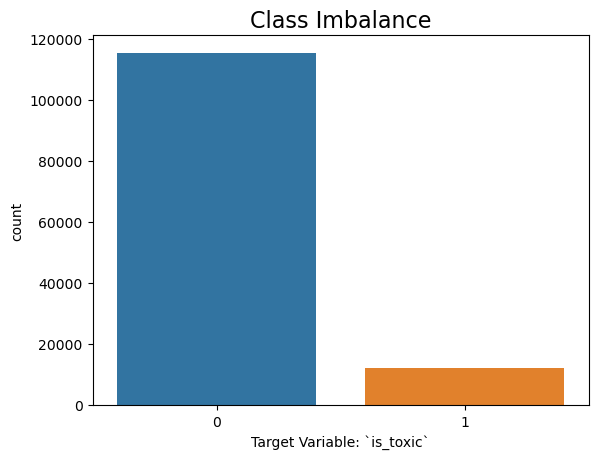

In [68]:
sns.countplot(data=df, x="is_toxic")
plt.title("Class Imbalance", size = 16)
plt.xlabel("Target Variable: `is_toxic`")
plt.show()

## Year

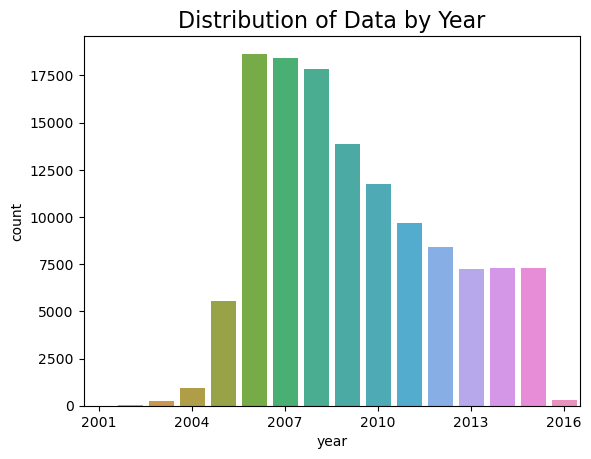

In [67]:
sns.countplot(data=df, x="year")
tick_positions = np.arange(0, 18, 3)
plt.xticks(tick_positions)
plt.title("Distribution of Data by Year", size = 16)
plt.show()

# Confusion Matrix - CNN Model

In [121]:
threshold = 0.5

In [122]:
df['cnn_probability'] = 1 / (1 + np.exp(-df['cnn_scores']))

In [123]:
y_true = df['is_toxic']
y_pred = (df['cnn_probability'] >= threshold).astype(int)

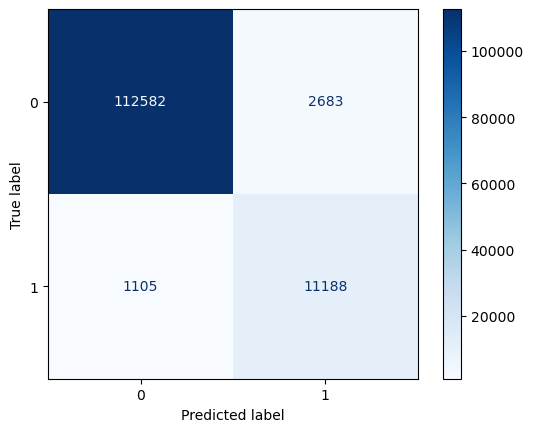

In [124]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [125]:
TN, FP, FN, TP = cm.ravel()

FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

In [126]:
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

False Positive Rate (FPR): 0.02327679694616753
False Negative Rate (FNR): 0.08988855446188888


## Varying Thresholds

In [142]:
thresholds = [x / 10.0 for x in range(2, 10, 1)]

In [143]:
df['cnn_probability'] = 1 / (1 + np.exp(-df['cnn_scores']))

FPRs = list()
FNRs = list()

In [144]:
for threshold in thresholds:
    y_true = df['is_toxic']
    y_pred = (df['cnn_probability'] >= threshold).astype(int)

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    TN, FP, FN, TP = cm.ravel()

    FPR = FP / (FP + TN)
    FNR = FN / (FN + TP)
    
    FPRs.append(FPR)
    FNRs.append(FNR)

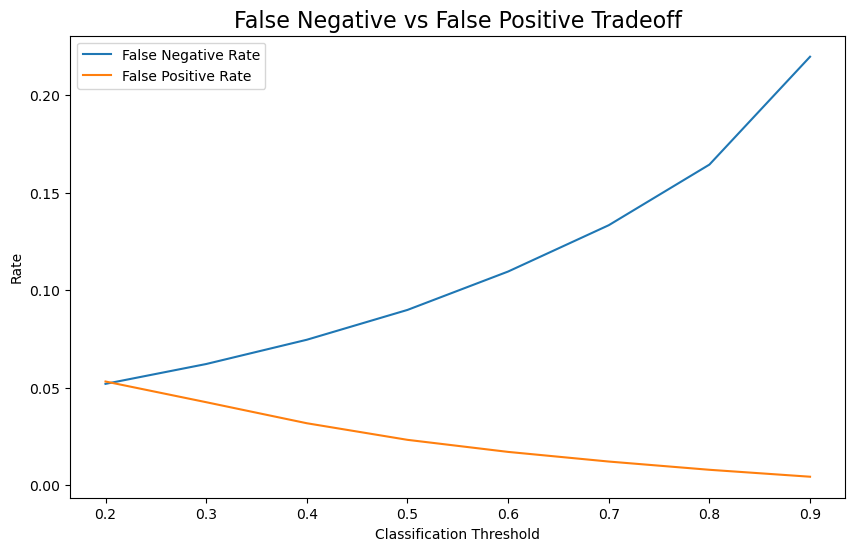

In [152]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot the first line
sns.lineplot(x=thresholds, y=FNRs, label='False Negative Rate')

# Plot the second line
sns.lineplot(x=thresholds, y=FPRs, label='False Positive Rate')

# Add title and labels
plt.title('False Negative vs False Positive Tradeoff', size = 16)
plt.xlabel('Classification Threshold')
plt.ylabel('Rate')

# Display the legend
plt.legend()

# Show the plot
plt.show()

# Confusion Matrix - Conversation AI Model

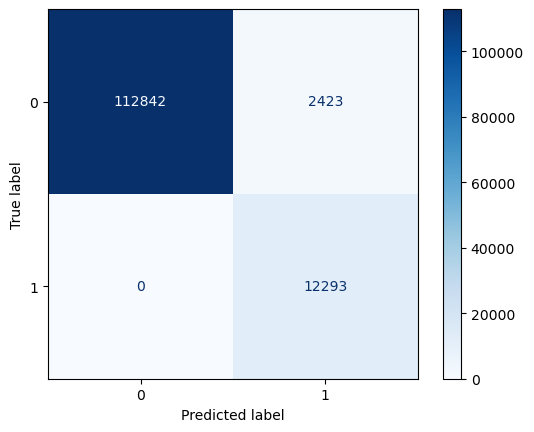

False Positive Rate (FPR): 0.021021125233158373
False Negative Rate (FNR): 0.0


In [120]:
threshold = 0.5

y_true = df['is_toxic']
y_pred = (df['toxicity'] >= threshold).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.show()

TN, FP, FN, TP = cm.ravel()

FPR = FP / (FP + TN)
FNR = FN / (FN + TP)

print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)